<a href="https://colab.research.google.com/github/YoselinVasquez/Genomica-Evolutiva/blob/main/notebooks/5_ed_sec/5_ed_secuen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!cd /content/drive/MyDrive/Colab_Notebooks/gen_evol/datasets

# Instalamos Biopython, una librería para trabajar con datos biológicos
!pip install biopython

# Importamos los módulos necesarios
from Bio import Entrez, SeqIO

# NCBI requiere que se proporcione un correo electrónico para usar Entrez
Entrez.email = "allasicanales@gmail.com"  # Reemplaza con tu correo

# Definimos el número de acceso de la secuencia que queremos recuperar
accession = "M79328" # Solanum tuberosum alpha-amylase


# Usamos Entrez para obtener la secuencia en formato FASTA
handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

# Guardamos la secuencia en un archivo FASTA local
SeqIO.write(record, "/content/drive/MyDrive/Colab_Notebooks/Herramientas_Bioinformaticas/Notebooks/mi_secuencia.fasta", "fasta")

# Mostramos información básica de la secuencia
print("ID:", record.id)
print("Descripción:", record.description)
print("Longitud:", len(record.seq))
print("Primeros 102 nucleótidos:", record.seq[:101])



/bin/bash: line 1: cd: /content/drive/MyDrive/Colab_Notebooks/gen_evol/datasets: No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/Herramientas_Bioinformaticas/Notebooks/mi_secuencia.fasta'

In [ ]:
# Importamos módulos para trabajar con secuencias
from Bio import SeqIO
from Bio.Seq import Seq


# Leemos la secuencia guardada en el archivo FASTA
registro = SeqIO.read("/content/drive/MyDrive/Colab_Notebooks/gen_evol/datasets/mi_secuencia.fasta", "fasta")

# Convertimos la secuencia (string) a una lista de caracteres para poder editarla
seq_list = list(str(registro.seq))

# Realizamos una mutación en la posición 100 (cambiamos el nucleótido por 'A')
seq_list[100] = "A"

# Reconstruimos la secuencia de caracteres a una cadena de texto (string) como objeto Seq
secuencia_mutada = Seq("".join(seq_list))

# Mostramos los primeros 101 nucleótidos de la secuencia mutada
print("Secuencia mutada (primeros 101 nt):", secuencia_mutada[:101])


Secuencia mutada (primeros 101 nt): CGACAGTCGCCGTCGTCACCGCCACCGCACTATTCTCGACGCGTCGTCTATCTCCTCCACCCCACAGCCGTCAATTCCAAGCTTCCAATGAACCGTTGCCA


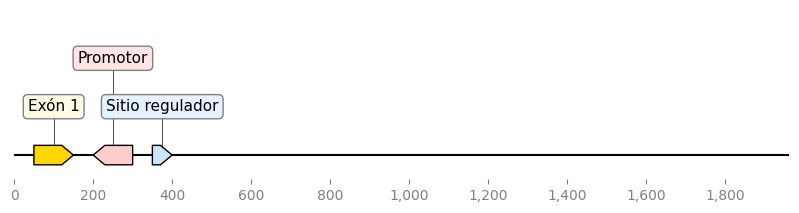

In [ ]:
# Instalamos la librería para visualizar secuencias con anotaciones
!pip install dna_features_viewer

# Importamos los módulos necesarios
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

# Creamos anotaciones ficticias sobre la secuencia
features = [
    GraphicFeature(start=50, end=150, strand=+1, color="#ffd700", label="Exón 1"),
    GraphicFeature(start=200, end=300, strand=-1, color="#ffcccc", label="Promotor"),
    GraphicFeature(start=350, end=400, strand=+1, color="#cce5ff", label="Sitio regulador")
]

# Creamos el gráfico con las anotaciones
record = GraphicRecord(sequence_length=len(secuencia_mutada), features=features)
ax, _ = record.plot(figure_width=10)
plt.show() # Mostramos el gráfico


In [ ]:
# Importamos el módulo para crear un nuevo registro de secuencia
from Bio.SeqRecord import SeqRecord

# Creamos un nuevo objeto SeqRecord con la secuencia mutada
registro_editado = SeqRecord(
    secuencia_mutada,
    id="Editado_NCBI",
    description="Secuencia con mutación en posición 100"
)

# Guardamos la secuencia editada en un nuevo archivo FASTA
with open("/content/drive/MyDrive/Colab_Notebooks/gen_evol/output/mi_secuencia_editada.fasta", "w") as output_handle:
    SeqIO.write(registro_editado, output_handle, "fasta")

# Confirmamos que el archivo fue guardado
print("Secuencia editada guardada como '/content/drive/MyDrive/Colab_Notebooks/gen_evol/output/mi_secuencia_editada.fasta'")


Secuencia editada guardada como '/content/drive/MyDrive/Colab_Notebooks/gen_evol/output/mi_secuencia_editada.fasta'
